# Exercise 08

 #### Sandra Marcela Meneses Quinchía  -    código: 201727731
 #### Diego Fernando López Castillo    -    código:200919053


## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets[['airline_sentiment','text']]

,airline_sentiment,text
tweet_id,,
570306133677760513,neutral,@VirginAmerica What @dhepburn said.
570301130888122368,positive,@VirginAmerica plus you've added commercials t...
570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
570300767074181121,negative,@VirginAmerica seriously would pay $30 a fligh...
570300616901320704,positive,"@VirginAmerica yes, nearly every time I fly VX..."
570300248553349120,neutral,@VirginAmerica Really missed a prime opportuni...
570299953286942721,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"


In [3]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [4]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [5]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

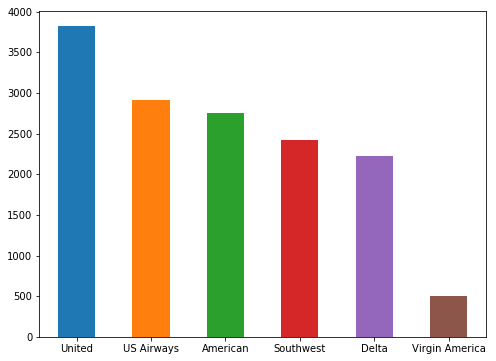

In [6]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

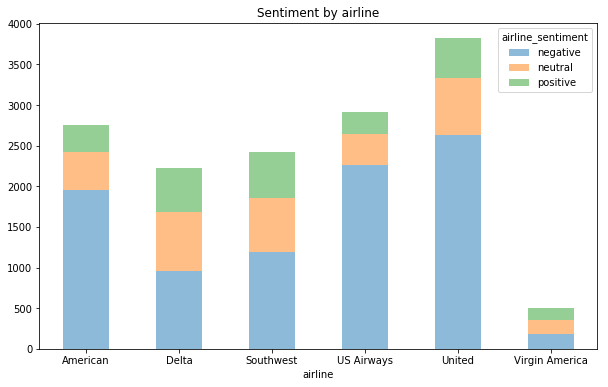

In [7]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score, roc_auc_score

In [12]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [13]:
y.describe()

count    14640.000000
mean        -0.465505
std          0.756084
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.000000
max          1.000000
Name: airline_sentiment, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## CountVectorizer

In [15]:
# use CountVectorizer to create document-term matrices from X. Se crea una matriz que cuenta cuantas veces aparece una palabra
vect = CountVectorizer()
X_dtm = vect.fit_transform(X_train)
X_dtm2 = vect.transform(X_test)

In [16]:
#12056 tweets
X_dtm.shape

(9808, 12056)

In [17]:
#El sistema crea las palabras y le asigna un indice a cada una, genera una matriz para representar de forma matricial el texto.
temp= X_dtm.todense()[:10]
temp

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
print(X_dtm.todense()[0].argmax())

1680


In [19]:
#palabra mas comun
vect.get_feature_names()[X_dtm.todense()[0].argmax()]

'am'

In [20]:
# last 50 features
print(vect.get_feature_names()[-150:-100])

['xc6jq70r7b', 'xcvqxykg49', 'xd', 'xdjzkc34gb', 'xedeckgmw5', 'xf9mpnaaje', 'xgfs6tjtmo', 'xgpaayfdwt', 'xhsuupheze', 'xijifymvqp', 'xm', 'xmrvr4lgeg', 'xmz3tf9ix8', 'xna', 'xox', 'xoxo', 'xpm98igqjn', 'xrdtov7nl8', 'xtra', 'xx', 'xx2m2jxqep', 'xx5qscjll1', 'xxppzo88j1', 'xxsaombdgs', 'xxy2d2imnp', 'xzbajmiekx', 'xzmscw', 'y3sahvx3zk', 'y5qe9hcqzt', 'ya', 'yaffasolin', 'yall', 'yards', 'yasss', 'yasssss', 'yay', 'yayayay', 'ybmbgs0dhn', 'yc7v2s0iod', 'yco9dikpt9', 'yday', 'yea', 'yeah', 'year', 'yearly', 'years', 'yeehaw', 'yeg', 'yell', 'yelled']


In [21]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42)

In [22]:
clf.fit(X_dtm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [23]:
#Predict
y_pred_countv = clf.predict_proba(X_dtm2)

In [24]:
#Accuracy
print(pd.Series(cross_val_score(clf,X_dtm,y_train, cv=10)).describe())

count    10.000000
mean      0.621432
std       0.000757
min       0.620795
25%       0.621181
50%       0.621305
75%       0.621429
max       0.623469
dtype: float64


# Stopwords

In [25]:
# use CountVectorizer to create document-term matrices from X. Se crea una matriz que cuenta cuantas veces aparece una palabra
vect_s = CountVectorizer(stop_words='english')
X_dtms = vect_s.fit_transform(X_train)
X_dtms2 = vect_s.transform(X_test)

In [26]:
#12056 tweets
X_dtms.shape

(9808, 11777)

In [27]:
#El sistema crea las palabras y le asigna un indice a cada una, genera una matriz para representar de forma matricial el texto.
temp= X_dtms.todense()[:10]
temp

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
print(X_dtms.todense()[0].argmax())

3335


In [29]:
#palabra mas comun
vect.get_feature_names()[X_dtms.todense()[0].argmax()]

'conveyor'

In [30]:
# last 50 features
print(vect_s.get_feature_names()[-150:-100])

['x7ilzqdwe2', 'x9blwgwa68', 'x__x', 'xaspqdsqhe', 'xatoxbnsfa', 'xbkvcraokn', 'xc6jq70r7b', 'xcvqxykg49', 'xd', 'xdjzkc34gb', 'xedeckgmw5', 'xf9mpnaaje', 'xgfs6tjtmo', 'xgpaayfdwt', 'xhsuupheze', 'xijifymvqp', 'xm', 'xmrvr4lgeg', 'xmz3tf9ix8', 'xna', 'xox', 'xoxo', 'xpm98igqjn', 'xrdtov7nl8', 'xtra', 'xx', 'xx2m2jxqep', 'xx5qscjll1', 'xxppzo88j1', 'xxsaombdgs', 'xxy2d2imnp', 'xzbajmiekx', 'xzmscw', 'y3sahvx3zk', 'y5qe9hcqzt', 'ya', 'yaffasolin', 'yall', 'yards', 'yasss', 'yasssss', 'yay', 'yayayay', 'ybmbgs0dhn', 'yc7v2s0iod', 'yco9dikpt9', 'yday', 'yea', 'yeah', 'year']


In [31]:
clf_s = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42)

In [32]:
clf_s.fit(X_dtms, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [33]:
#Predict
y_pred_countv = clf_s.predict_proba(X_dtms2)

In [34]:
#Accuracy
print(pd.Series(cross_val_score(clf_s,X_dtms,y_train, cv=10)).describe())

count    10.000000
mean      0.621228
std       0.000254
min       0.620795
25%       0.621181
50%       0.621305
75%       0.621429
max       0.621429
dtype: float64


# N_gram

In [42]:
vect_n = CountVectorizer(ngram_range=(1, 2))
X_dtmn = vect_n.fit_transform(X_train)
X_dtmn2 = vect_n.transform(X_test)
X_dtmn.shape

(9808, 87608)

In [43]:
clf_n = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42)

In [44]:
clf_n.fit(X_dtmn, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
#Predict
y_pred_countv = clf_n.predict_proba(X_dtmn2)

In [46]:
#Accuracy
print(pd.Series(cross_val_score(clf_n,X_dtmn,y_train, cv=10)).describe())

count    10.000000
mean      0.621228
std       0.000254
min       0.620795
25%       0.621181
50%       0.621305
75%       0.621429
max       0.621429
dtype: float64


## Stemmer

In [55]:
words = list(vect.vocabulary_.keys())[:100]

In [56]:
print([stemmer.stem(word) for word in words])

['jetblu', 'of', 'cours', 'am', 'americanair', 'complt', 'incompet', 'on', 'flt', '295', 'lav', 'delay', 'from', 'pln', 'that', 'lnded', 'last', 'nite', 'no', 'internet', 'and', 'poor', 'svc', 'not', 'what', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'depart', 'mco', 'enrout', 'to', 'no_airport', 'http', 'co', 'fd4snvkiem', 'usairway', 'doe', 'anyon', 'your', 'airlin', 'know', 'how', 'do', 'their', 'job', 'unit', 'want', 'plane', 'dad', 'my', '386', 'dalla', 'jacksonvill', 'fl', 'has', 'been', 'cancel', 'flightl', 'one', 'notifi', 'me', 'go', 'it', 'is', 'tri', 'make', 'but', 'probabl', 'too', 'late', 'did', 'see', 'an', 'email', 'could', 'call', 'pittsburgh', 'intern', 'alway', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'look', 'welcom', 'you', 'onboard', 'have', 'the', 'abil', 'switch', 'cannot', 'tell', 'where', 'bag', 'are']


In [65]:
stemmer = SnowballStemmer('english')

def split_into_stemmer(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

vect_st = CountVectorizer(analyzer=split_into_stemmer)
X_dtmstm = vect_st.fit_transform(X_train)
X_dtmstm2 = vect_st.transform(X_test)
X_dtmstm.shape

(9808, 18559)

In [66]:
clf_st = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42)

In [67]:
clf_st.fit(X_dtmstm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [68]:
#Predict
y_pred_countst = clf_st.predict_proba(X_dtmstm2)

In [69]:
#Accuracy
print(pd.Series(cross_val_score(clf_st,X_dtmstm,y_train, cv=10)).describe())

count    10.000000
mean      0.621228
std       0.000254
min       0.620795
25%       0.621181
50%       0.621305
75%       0.621429
max       0.621429
dtype: float64


## TfidfVectorizer

In [89]:
vect_tf = TfidfVectorizer()
X_dtmtf = vect_tf.fit_transform(X_train)
features = vect_tf.get_feature_names()
X_dtmtf2 = vect_tf.transform(X_test)
X_dtmtf.shape

(9808, 12056)

In [90]:
clf_tf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42)

In [91]:
clf_tf.fit(X_dtmtf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [92]:
#Predict
y_pred_tf = clf_tf.predict_proba(X_dtmtf2)

In [93]:
#Accuracy
print(pd.Series(cross_val_score(clf_tf,X_dtmtf,y_train, cv=10)).describe())

count    10.000000
mean      0.621330
std       0.000266
min       0.620795
25%       0.621181
50%       0.621429
75%       0.621429
max       0.621814
dtype: float64


## Uniendo varios parámetros en un modelo 

In [95]:
words = list(vect.vocabulary_.keys())[:100]

In [96]:
print([stemmer.stem(word) for word in words])

['jetblu', 'of', 'cours', 'am', 'americanair', 'complt', 'incompet', 'on', 'flt', '295', 'lav', 'delay', 'from', 'pln', 'that', 'lnded', 'last', 'nite', 'no', 'internet', 'and', 'poor', 'svc', 'not', 'what', 'expect', 'southwestair', 'flight', '4968', 'n8325d', 'depart', 'mco', 'enrout', 'to', 'no_airport', 'http', 'co', 'fd4snvkiem', 'usairway', 'doe', 'anyon', 'your', 'airlin', 'know', 'how', 'do', 'their', 'job', 'unit', 'want', 'plane', 'dad', 'my', '386', 'dalla', 'jacksonvill', 'fl', 'has', 'been', 'cancel', 'flightl', 'one', 'notifi', 'me', 'go', 'it', 'is', 'tri', 'make', 'but', 'probabl', 'too', 'late', 'did', 'see', 'an', 'email', 'could', 'call', 'pittsburgh', 'intern', 'alway', 'look', 'forward', 'jb', 'rt', 'bostongarden', 'look', 'welcom', 'you', 'onboard', 'have', 'the', 'abil', 'switch', 'cannot', 'tell', 'where', 'bag', 'are']


In [98]:
stemmer = SnowballStemmer('english')

def split_into_stemmer(text):
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]

vect_ = CountVectorizer(analyzer=split_into_stemmer, ngram_range=(1, 2),stop_words='english')
X_dtm_ = vect_st.fit_transform(X_train)
X_dtm_2 = vect_st.transform(X_test)
X_dtm_.shape

(9808, 18559)

In [99]:
clf_ = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42)

In [100]:
clf_.fit(X_dtm_, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [101]:
#Predict
y_pred_ = clf_.predict_proba(X_dtm_2)

In [102]:
#Accuracy
print(pd.Series(cross_val_score(clf_,X_dtm_,y_train, cv=10)).describe())

count    10.000000
mean      0.621228
std       0.000254
min       0.620795
25%       0.621181
50%       0.621305
75%       0.621429
max       0.621429
dtype: float64


# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text. Vector (countvectorizer). Input shape son las columnas. Es el features 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax) output es 3

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [103]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [105]:
X_dtm.shape

(9808, 12056)

In [106]:
Y = np_utils.to_categorical(y_train,3)
Y2 = np_utils.to_categorical(y_test,3)

In [107]:
input_shape=X_dtm.shape[1:]
input_shape

(12056,)

In [108]:
#Dropout ayuda a evitar el overfitting
input_shape=X_train.shape

model = Sequential()
model.add(Dense(units=128,input_shape=X_dtm.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=3))
model.add(Activation('softmax'))

In [109]:
#Train
from keras.optimizers import rmsprop
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
              metrics = ['accuracy'])

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1543296   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,544,195
Trainable params: 1,543,939
Non-trainable params: 256
________________________________________________________________

In [112]:
model.fit(X_dtm, Y, epochs=50, verbose=2)

Epoch 1/50
 - 9s - loss: 1.0938 - acc: 0.5269
Epoch 2/50
 - 10s - loss: 0.7855 - acc: 0.6766
Epoch 3/50
 - 10s - loss: 0.6529 - acc: 0.7367
Epoch 4/50
 - 10s - loss: 0.5610 - acc: 0.7767
Epoch 5/50
 - 10s - loss: 0.4983 - acc: 0.8087
Epoch 6/50
 - 10s - loss: 0.4438 - acc: 0.8269
Epoch 7/50
 - 9s - loss: 0.4138 - acc: 0.8427
Epoch 8/50
 - 9s - loss: 0.3792 - acc: 0.8564
Epoch 9/50
 - 9s - loss: 0.3549 - acc: 0.8641
Epoch 10/50
 - 9s - loss: 0.3315 - acc: 0.8752
Epoch 11/50
 - 9s - loss: 0.3089 - acc: 0.8874
Epoch 12/50
 - 9s - loss: 0.2884 - acc: 0.8981
Epoch 13/50
 - 9s - loss: 0.2760 - acc: 0.9009
Epoch 14/50
 - 9s - loss: 0.2592 - acc: 0.9071
Epoch 15/50
 - 10s - loss: 0.2475 - acc: 0.9113
Epoch 16/50
 - 11s - loss: 0.2324 - acc: 0.9186
Epoch 17/50
 - 10s - loss: 0.2270 - acc: 0.9215
Epoch 18/50
 - 10s - loss: 0.2166 - acc: 0.9232
Epoch 19/50
 - 9s - loss: 0.2058 - acc: 0.9298
Epoch 20/50
 - 10s - loss: 0.1896 - acc: 0.9372
Epoch 21/50
 - 9s - loss: 0.1803 - acc: 0.9406
Epoch 22/50


In [113]:
#Predict
print(model.predict(X_dtm2))

[[3.6626219e-04 9.9867260e-01 9.6109841e-04]
 [2.3596494e-05 1.2739440e-06 9.9997509e-01]
 [4.0315306e-05 5.6041190e-06 9.9995410e-01]
 ...
 [3.8830983e-03 1.4765844e-03 9.9464029e-01]
 [9.3352884e-01 4.7524750e-02 1.8946396e-02]
 [6.1976656e-02 2.9762415e-02 9.0826094e-01]]


In [114]:
#Performance
score = model.evaluate(X_dtm2, Y2)
print('Test score:', score[0])
print('Test accuracy:', score[1])

4832/4832 [==============================] - 2s 450us/step
Test score: 0.7163425794500389
Test accuracy: 0.7957367549668874
